# Experiment: AlexNet implementation trained on Imagenette

We ran the challenge pipeline on our AlexNet model trained on the Imagenette dataset, which is a downsampled version of ImageNet for fast experimentation with different models.

## Results

This model got a score of `22.00` when taken from layer `conv2d_5_pool`, which was the max pooling layer after the last convolutional layer. It is a relatively significant improvement over the untrained baseline, which had a score of `15.12` and is higher than the score of the model trained on the CIFAR-100 dataset, which is why this model was chosen as the model to be improved by fine-tuning and layer-merging. See related notebook for further results.

Below is the correlation graph for subject 1.

### conv2d_5_pool (Subject 1)

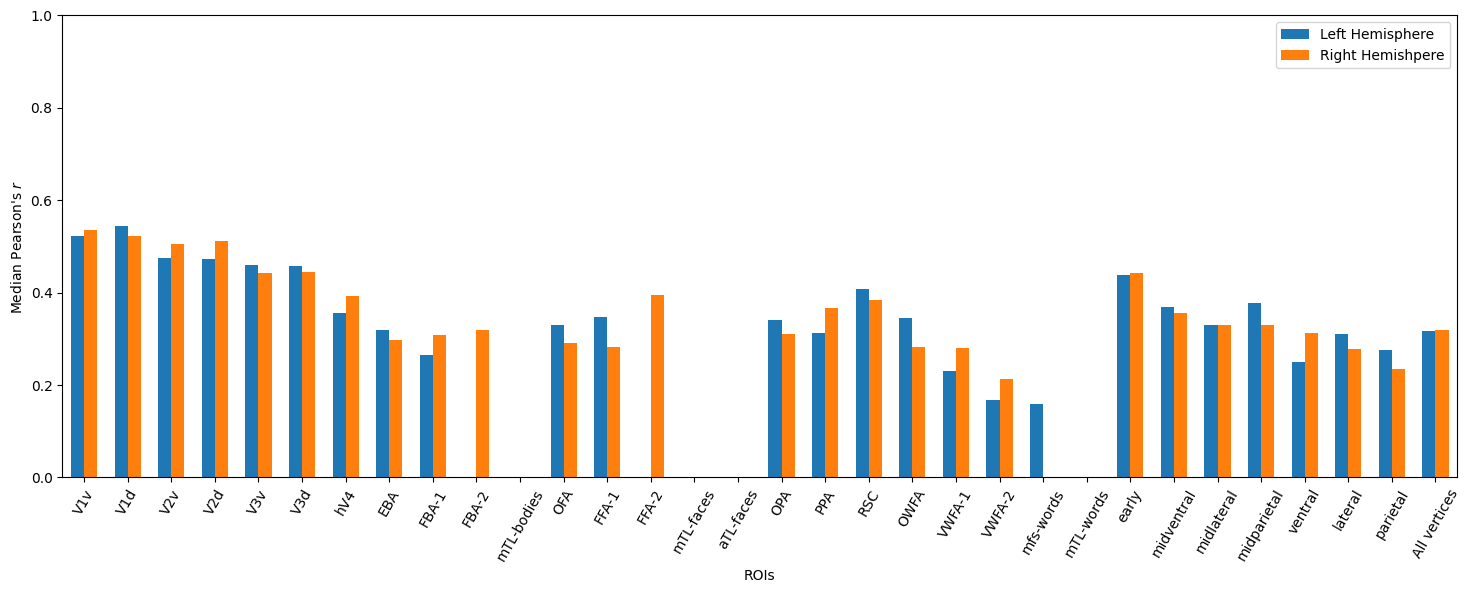

# Full Code

Below is the full code for running this model, which should generate all results for the given layers and subjects.

In [ ]:
from src.algonauts.models import model_loaders
from src.algonauts.data_processors.image_transforms import transform_alexnet

In [ ]:
experiment = 'alexnet_on_imagenette'
batch_size = 300

In [ ]:
platform = 'jupyter_notebook' #@param ['colab', 'paperspace'] {allow-input: true}

if platform == 'jupyter_notebook':
    base_dir = '../..'
    challenge_data_dir = f'{base_dir}/data/algonauts_2023_challenge_data'
    exp_output_dir = f'{base_dir}/data/out/{experiment}'

if platform == 'paperspace':
    base_dir = '.'
    challenge_data_dir = '/storage/algonauts_2023_challenge_data'
    exp_output_dir = f'/notebooks/data/out/{experiment}'

### Load model

In [ ]:
model_filename = f'{base_dir}/data/models/alexnet_imagenette.h5'  # model trained for 16 epochs with early stopping
model_loader = lambda: model_loaders.load_from_file(model_filename, transform_alexnet)

### Print the model layers

In [ ]:
model, _ = model_loader()
print(*(layer.name for layer in model.layers), sep=' -> ')
del model

Metal device set to: Apple M1 Pro


2023-03-29 12:05:02.858182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-29 12:05:02.858506: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


conv2d_1 -> conv2d_1_bn -> conv2d_1_pool -> conv2d_2 -> conv2d_2_bn -> conv2d_2_pool -> conv2d_3 -> conv2d_3_bn -> conv2d_4 -> conv2d_4_bn -> conv2d_5 -> conv2d_5_bn -> conv2d_5_pool -> flatten -> dense -> dropout -> dense_1 -> dropout_1 -> dense_2


## Select layers and subjects
Now let's define which layer(s) we will pick from, and which subject(s) to process.

Best layer for all vertices was found to be 'conv2d_5_pool'

In [ ]:
layers = ['conv2d_5_pool']
subjects = [
    1, 2, 3, 4, 5, 6, 7, 8
    ]


## Run pipeline

In [ ]:
from src.algonauts.pipelines.tf_pipeline import run_tf_pipeline

run_tf_pipeline(batch_size=batch_size, model_loader=model_loader, layers=layers, subjects=subjects,
                challenge_data_dir=challenge_data_dir,
                exp_output_dir=exp_output_dir)

## Merge predictions from best layers for each ROI

In [ ]:
from src.algonauts.evaluators.predictions import merge_predictions_for_all_subjects
merge_predictions_for_all_subjects(subjects, challenge_data_dir, exp_output_dir)

## Print best layers

In [ ]:
import json
from src.algonauts.evaluators.correlations import find_best_correlations

subj = 1
result = find_best_correlations(f'{exp_output_dir}/results.json', subj)
print(json.dumps(result, indent=2))
